In [1]:
import numpy as np
import pandas as pd

In [4]:
match = pd.read_csv('/content/matches.csv')
delivery = pd.read_csv('/content/deliveries.csv')

In [6]:
match.head()
#displays first 5 rows of the dataframe

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [7]:
match.shape

# displays the no of rows and columns in the dataset

(1095, 20)

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [11]:
delivery.shape

(102271, 17)

In [12]:
total_score_df = delivery.groupby(['match_id','inning']).sum()['total_runs'].reset_index()

In [13]:
total_score_df = total_score_df[total_score_df['inning'] == 1]

In [14]:
total_score_df

,match_id,inning,total_runs
0,335982,1,222
2,335983,1,240
4,335984,1,129
6,335985,1,165
8,335986,1,110
...,...,...,...
861,733987,1,231
863,733989,1,134
865,733991,1,198
867,733993,1,143


In [15]:
match_df = match.merge(total_score_df[['match_id','total_runs']],left_on='id',right_on='match_id')

In [16]:
match_df
#contains match level details of Ipl Games(teams,veneus, results, toss winner,player of the match etc)

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,match_id,total_runs
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen,335982,222
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,...,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri,335983,240
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,...,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar,335984,129
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,...,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper,335985,165
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,...,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan,335986,110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,733987,2014,Cuttack,2014-05-07,League,GJ Maxwell,Barabati Stadium,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,...,runs,44.0,232.0,20.0,N,NaN,HDPK Dharmasena,PG Pathak,733987,231
427,733989,2014,Ahmedabad,2014-05-08,League,B Kumar,"Sardar Patel Stadium, Motera",Rajasthan Royals,Sunrisers Hyderabad,Rajasthan Royals,...,runs,32.0,135.0,20.0,N,NaN,AK Chaudhary,NJ Llong,733989,134
428,733991,2014,Bangalore,2014-05-09,League,Sandeep Sharma,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,...,runs,32.0,199.0,20.0,N,NaN,S Ravi,K Srinath,733991,198
429,733993,2014,Delhi,2014-05-10,League,DW Steyn,Feroz Shah Kotla,Delhi Daredevils,Sunrisers Hyderabad,Sunrisers Hyderabad,...,wickets,8.0,43.0,5.0,N,D/L,RM Deshpande,BNJ Oxenford,733993,143


In [17]:
match_df['team1'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad'],
      dtype=object)

In [ ]:
teams = [
    'Sunrisers Hyderabad',
    'Mumbai Indians',
    'Royal Challengers Bangalore',
    'Kolkata Knight Riders',
    'Kings XI Punjab',
    'Chennai Super Kings',
    'Rajasthan Royals',
    'Delhi Capitals',
    # 'Gujarat Titans',
    # 'Lucknow Super Giants'
]

In [19]:
match_df['team1'] = match_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['team2'] = match_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')

match_df['team1'] = match_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['team2'] = match_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')


# Renames old team names (Delhi Daredevils → Delhi Capitals, Deccan Chargers → Sunrisers Hyderabad) for consistency

In [20]:
match_df = match_df[match_df['team1'].isin(teams)]
match_df = match_df[match_df['team2'].isin(teams)]

# Filtering Matches with Only Selected Teams

In [21]:
match_df.shape

# Checking Data Shape (Rows, Columns)

# 839 matches and 22 columns remain

(280, 22)

In [22]:
print(match_df.columns)
  # Print Available Columns in match_df

if 'dl_applied' not in match_df.columns:
    match_df['dl_applied'] = 0  # Assigning default value





Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2', 'match_id', 'total_runs'],
      dtype='object')


In [23]:
# Check if the 'dl_applied' column exists in the DataFrame
if 'dl_applied' in match_df.columns:
    match_df = match_df[match_df['dl_applied'] == 0]
else:
    print("Column 'dl_applied' not found in the DataFrame.")
    # Handle the missing column appropriately.
    # For example, you could skip this filtering step or create a new column with default values.
    # In this case, we'll skip the filtering:
    pass  # Do nothing if the column is not found


In [24]:
match_df = match_df[['match_id','city','winner','total_runs']]
#updated columns dispalyed

In [25]:
delivery_df = match_df.merge(delivery,on='match_id')

In [26]:
delivery_df = delivery_df[delivery_df['inning'] == 2]
#Keeps only records where inning == 2, meaning only the second innings data is retained.

In [27]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
124,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,AB Dinda,W Jaffer,1,0,1,NaN,0,NaN,NaN,NaN
125,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,AB Dinda,R Dravid,0,1,1,wides,0,NaN,NaN,NaN
126,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,AB Dinda,R Dravid,0,0,0,NaN,0,NaN,NaN,NaN
127,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,AB Dinda,R Dravid,1,0,1,NaN,0,NaN,NaN,NaN
128,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,AB Dinda,W Jaffer,1,0,1,NaN,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66826,733995,Mumbai,Chennai Super Kings,157,2,Chennai Super Kings,Mumbai Indians,2,6,BB McCullum,P Kumar,DR Smith,1,0,1,NaN,0,NaN,NaN,NaN
66827,733995,Mumbai,Chennai Super Kings,157,2,Chennai Super Kings,Mumbai Indians,3,1,BB McCullum,JJ Bumrah,DR Smith,0,1,1,legbyes,0,NaN,NaN,NaN
66828,733995,Mumbai,Chennai Super Kings,157,2,Chennai Super Kings,Mumbai Indians,3,2,DR Smith,JJ Bumrah,BB McCullum,0,0,0,NaN,0,NaN,NaN,NaN
66829,733995,Mumbai,Chennai Super Kings,157,2,Chennai Super Kings,Mumbai Indians,3,3,DR Smith,JJ Bumrah,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN


In [28]:
# Convert 'total_runs_y' to numeric before applying cumsum    ((cumulative sum))
delivery_df['total_runs_y'] = pd.to_numeric(delivery_df['total_runs_y'], errors='coerce')

# Now apply the cumsum function to calculate current score:
delivery_df['current_score'] = delivery_df.groupby('match_id')['total_runs_y'].cumsum()

In [29]:
delivery_df['runs_left'] = delivery_df['total_runs_x'] - delivery_df['current_score']

In [30]:
delivery_df['balls_left'] = 126 - (delivery_df['over']*6 + delivery_df['ball'])
# 126 -20 = total balls in an innings

In [31]:
delivery_df
# shows the updated delivery_df DataFrame

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,extra_runs,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
124,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,...,0,1,NaN,0,NaN,NaN,NaN,1,221,125
125,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,...,1,1,wides,0,NaN,NaN,NaN,2,220,124
126,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,...,0,0,NaN,0,NaN,NaN,NaN,2,220,123
127,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,...,0,1,NaN,0,NaN,NaN,NaN,3,219,122
128,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,...,0,1,NaN,0,NaN,NaN,NaN,4,218,121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66826,733995,Mumbai,Chennai Super Kings,157,2,Chennai Super Kings,Mumbai Indians,2,6,BB McCullum,...,0,1,NaN,0,NaN,NaN,NaN,16,141,108
66827,733995,Mumbai,Chennai Super Kings,157,2,Chennai Super Kings,Mumbai Indians,3,1,BB McCullum,...,1,1,legbyes,0,NaN,NaN,NaN,17,140,107
66828,733995,Mumbai,Chennai Super Kings,157,2,Chennai Super Kings,Mumbai Indians,3,2,DR Smith,...,0,0,NaN,0,NaN,NaN,NaN,17,140,106
66829,733995,Mumbai,Chennai Super Kings,157,2,Chennai Super Kings,Mumbai Indians,3,3,DR Smith,...,1,1,legbyes,0,NaN,NaN,NaN,18,139,105


In [32]:
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna("0")   # Fill missing values in player_dismissed
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x:x if x == "0" else "1")   # Convert player_dismissed to a binary indicator (0 or 1)

delivery_df['player_dismissed'] = delivery_df['player_dismissed'].astype('int')     # Convert player_dismissed to integer type
# Apply cumsum only to the 'player_dismissed' column which is numeric.
wickets = delivery_df.groupby('match_id')['player_dismissed'].cumsum().values

# Continue with the rest of your code
delivery_df['wickets'] = 10 - wickets
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
124,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,...,1,NaN,0,0,NaN,NaN,1,221,125,10
125,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,...,1,wides,0,0,NaN,NaN,2,220,124,10
126,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,...,0,NaN,0,0,NaN,NaN,2,220,123,10
127,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,...,1,NaN,0,0,NaN,NaN,3,219,122,10
128,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,...,1,NaN,0,0,NaN,NaN,4,218,121,10


In [33]:
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
124,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,...,1,NaN,0,0,NaN,NaN,1,221,125,10
125,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,...,1,wides,0,0,NaN,NaN,2,220,124,10
126,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,...,0,NaN,0,0,NaN,NaN,2,220,123,10
127,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,...,1,NaN,0,0,NaN,NaN,3,219,122,10
128,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,...,1,NaN,0,0,NaN,NaN,4,218,121,10


In [34]:
# crr = runs/overs
delivery_df['crr'] = (delivery_df['current_score']*6)/(120 - delivery_df['balls_left'])

In [35]:
delivery_df['rrr'] = (delivery_df['runs_left']*6)/delivery_df['balls_left']

In [36]:
def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0

In [37]:
delivery_df['result'] = delivery_df.apply(result,axis=1)

In [38]:
final_df = delivery_df[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr','result']]

In [39]:
final_df = final_df.sample(final_df.shape[0])

In [40]:
final_df.sample()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
7348,Rajasthan Royals,Kolkata Knight Riders,Kolkata,50,53,6,147,8.686567,5.660377,1


In [41]:
final_df.dropna(inplace=True)

In [42]:
final_df = final_df[final_df['balls_left'] != 0]

In [43]:
X = final_df.iloc[:,:-1]
y = final_df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [45]:
X_train

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr
0,Royal Challengers Bangalore,Kolkata Knight Riders,Centurion,169,117,10,173,8.0,8.666667
1,Kings XI Punjab,Rajasthan Royals,Durban,166,77,5,211,6.27907,12.935065
2,Deccan Chargers,Kolkata Knight Riders,Kolkata,74,41,5,163,6.759494,10.829268
3,Kings XI Punjab,Chennai Super Kings,Chandigarh,88,42,8,240,11.692308,12.571429
4,Kolkata Knight Riders,Chennai Super Kings,Chennai,125,113,10,139,12.0,6.637168
...,...,...,...,...,...,...,...,...,...
25003,Deccan Chargers,Kolkata Knight Riders,Cape Town,10,54,8,101,8.272727,1.111111
25004,Rajasthan Royals,Chennai Super Kings,Jaipur,11,34,6,141,9.069767,1.941176
25005,Deccan Chargers,Chennai Super Kings,Chennai,130,100,9,160,9.0,7.8
25006,Royal Challengers Bangalore,Deccan Chargers,Johannesburg,36,33,4,143,7.37931,6.545455


In [44]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

imputer = SimpleImputer(strategy='most_frequent')  # Use 'mean' or 'median' for numerical data
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)





# Replace 'sparse=False' with 'sparse_output=False'
trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse_output=False,drop='first'),['batting_team','bowling_team','city'])
]
,remainder='passthrough')

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [47]:
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))

    #  ('step2', RandomForestClassifier())

])

In [48]:
X_train = X_train.replace([np.inf, -np.inf], np.nan)
X_test = X_test.replace([np.inf, -np.inf], np.nan)

# Now proceed with imputation and ColumnTransformer
imputer = SimpleImputer(strategy='most_frequent')
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse_output=False,drop='first'),['batting_team','bowling_team','city'])
], remainder='passthrough')

pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
        # ('step2', RandomForestClassifier())
])









pipe.fit(X_train,y_train)

<ipython-input-48-8ee3f1378e0a>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_train = X_train.replace([np.inf, -np.inf], np.nan)
<ipython-input-48-8ee3f1378e0a>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test = X_test.replace([np.inf, -np.inf], np.nan)
/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At 

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [49]:
X_train.describe()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr
count,25008,25008,25008,25008,25008,25008,25008,25008.0,25008.0
unique,8,8,22,248,122,11,109,4287.0,6808.0
top,Royal Challengers Bangalore,Chennai Super Kings,Mumbai,105,107,10,165,6.0,6.0
freq,4310,4379,3626,213,286,5115,990,645.0,273.0


In [50]:
y_pred = pipe.predict(X_test)

In [51]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)






0.8298144593730007

In [52]:

pipe.predict_proba(X_test)[10]

array([0.8233316, 0.1766684])

In [53]:
def match_summary(row):
    print("Batting Team-" + row['batting_team'] + " | Bowling Team-" + row['bowling_team'] + " | Target- " + str(row['total_runs_x']))




In [54]:
def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]
    temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)

    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]

    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target


In [55]:
print(delivery_df['match_id'].unique())




[335982 335983 335985 335986 335987 335989 335990 335991 335992 335993
 335994 335996 335997 335999 336000 336003 336034 336005 336006 336007
 336008 336010 336011 336013 336014 336016 336018 336021 336023 336024
 336025 336027 336028 336029 336031 336033 336002 336035 336036 336037
 336012 336019 336039 336040 392181 392182 392184 392185 392186 392188
 392190 392191 392192 392195 392196 392197 392199 392200 392202 392203
 392204 392205 392207 392208 392209 392210 392212 392213 392214 392216
 392217 392218 392220 392221 392222 392224 392225 392227 392228 392229
 392231 392233 392234 392236 392238 392239 419106 419107 419109 419110
 419112 419113 419115 419117 419118 419119 419121 419122 419123 419124
 419125 419126 419127 419129 419130 419132 419133 419135 419136 419137
 419138 419139 419141 419142 419143 419145 419146 419147 419148 419150
 419151 419153 419154 419156 419157 419158 419159 419161 419162 419163
 419164 419165 501198 501199 501203 501205 501206 501208 501209 501211
 50121

In [56]:
def match_progression(delivery_df, match_id, pipe):
    # Filter the DataFrame based on match_id
    temp_df = delivery_df[delivery_df['match_id'] == match_id]

    # Ensure temp_df is not empty
    if temp_df.empty:
        print("Warning: No data found for match_id:", match_id)
        return None, None

    # Get the features for prediction (excluding result column)
    features_for_prediction = temp_df[['batting_team', 'bowling_team', 'city', 'runs_left', 'balls_left', 'wickets', 'total_runs_x', 'crr', 'rrr']]

    # Replace infinite or very large values with NaN
    features_for_prediction = features_for_prediction.replace([np.inf, -np.inf], np.nan)

    # Impute NaN values if necessary
    from sklearn.impute import SimpleImputer
    # Use 'most_frequent' strategy for categorical features
    categorical_features = ['batting_team', 'bowling_team', 'city']
    numerical_features = ['runs_left', 'balls_left', 'wickets', 'total_runs_x', 'crr', 'rrr']

    # Create separate imputers for categorical and numerical features
    categorical_imputer = SimpleImputer(strategy='most_frequent')
    numerical_imputer = SimpleImputer(strategy='mean') # or 'median' depending on your data

    # Apply imputation to respective feature types
    features_for_prediction[categorical_features] = categorical_imputer.fit_transform(features_for_prediction[categorical_features])
    features_for_prediction[numerical_features] = numerical_imputer.fit_transform(features_for_prediction[numerical_features])

    # Make predictions using the pipeline
    target = pipe.predict_proba(features_for_prediction)  # Use predict_proba for probabilities

    # Return both values}
    return temp_df, target


In [57]:
temp_df, target = match_progression(delivery_df, 335982, pipe)
temp_df



,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,crr,rrr,result
124,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,...,0,NaN,NaN,1,221,125,10,-1.200000,10.608000,0
125,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,...,0,NaN,NaN,2,220,124,10,-3.000000,10.645161,0
126,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,...,0,NaN,NaN,2,220,123,10,-4.000000,10.731707,0
127,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,...,0,NaN,NaN,3,219,122,10,-9.000000,10.770492,0
128,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,...,0,NaN,NaN,4,218,121,10,-24.000000,10.809917,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,14,5,P Kumar,...,0,NaN,NaN,80,142,37,1,5.783133,23.027027,0
221,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,14,6,SB Joshi,...,0,NaN,NaN,81,141,36,1,5.785714,23.500000,0
222,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,14,7,P Kumar,...,0,NaN,NaN,81,141,35,1,5.717647,24.171429,0
223,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,15,1,SB Joshi,...,0,NaN,NaN,82,140,35,1,5.788235,24.000000,0


In [58]:
def match_progression(delivery_df, match_id, pipe):
    # Filter the DataFrame based on match_id
    temp_df = delivery_df[delivery_df['match_id'] == match_id]

    # Ensure temp_df is not empty
    if temp_df.empty:
        print("Warning: No data found for match_id:", match_id)
        return None, None

    # Filter for rows where 'ball' is 6, if any such rows exist
    match = temp_df[temp_df['ball'] == 6]

    # Check if the DataFrame is empty after filtering by 'ball' == 6
    if match.empty:
        # Handle the case where there are no deliveries with 'ball' == 6
        print("Warning: No deliveries with 'ball' == 6 found for match_id:", match_id)

        # Filter deliveries where 'over' is greater than 0 for alternative progress view
        # We can't use 'ball' == 6, because these are removed in some cases
        match = temp_df[temp_df['over'] > 0]
        if match.empty:
            print("No data found for alternate plot. Try a different match.")
            return None, None

        temp_df = match[['batting_team', 'bowling_team', 'city', 'runs_left', 'balls_left', 'wickets', 'total_runs_x', 'crr', 'rrr']].dropna()

    # Select relevant columns and drop rows with missing values
    else:
        temp_df = match[['batting_team', 'bowling_team', 'city', 'runs_left', 'balls_left', 'wickets', 'total_runs_x', 'crr', 'rrr']].dropna()
        temp_df = temp_df[temp_df['balls_left'] != 0]

    # Use predict_proba to get probabilities of winning and losing
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0] * 100, 1)
    temp_df['win'] = np.round(result.T[1] * 100, 1)

    # Create end_of_over column
    temp_df['end_of_over'] = range(1, temp_df.shape[0] + 1)

    # Get the target score
    target = temp_df['total_runs_x'].values[0] if not temp_df.empty else None

    # Calculate runs_after_over and wickets_in_over
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0, target)  # Insert target at the beginning
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)

    wickets = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0, 10)
    wickets.append(0)  # Append 0 for the last over
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]

    # ... rest of your code to calculate other columns ...

    # Select and return necessary columns
    temp_df = temp_df[['end_of_over', 'runs_after_over', 'wickets_in_over', 'lose', 'win']]

    return temp_df, target

In [59]:
print(temp_df.columns)



Index(['match_id', 'city', 'winner', 'total_runs_x', 'inning', 'batting_team',
       'bowling_team', 'over', 'ball', 'batter', 'bowler', 'non_striker',
       'batsman_runs', 'extra_runs', 'total_runs_y', 'extras_type',
       'is_wicket', 'player_dismissed', 'dismissal_kind', 'fielder',
       'current_score', 'runs_left', 'balls_left', 'wickets', 'crr', 'rrr',
       'result'],
      dtype='object')


In [60]:
temp_df.columns = temp_df.columns.str.strip()  # Removes leading/trailing spaces


In [61]:
required_columns = ['end_of_over', 'wickets_in_over', 'win', 'lose', 'runs_after_over']
for col in required_columns:
    if col not in temp_df.columns:
        print(f"Missing column: {col}")


Missing column: end_of_over
Missing column: wickets_in_over
Missing column: win
Missing column: lose
Missing column: runs_after_over


In [62]:
temp_df['end_of_over'] = range(1, len(temp_df) + 1)  # Example: Assigning sequential over numbers
temp_df['wickets_in_over'] = 0  # Assuming no wickets
temp_df['win'] = 0.5  # Placeholder win probability
temp_df['lose'] = 0.5  # Placeholder lose probability
temp_df['runs_after_over'] = 0  # Placeholder runs


<ipython-input-62-d7e9595eddf6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['end_of_over'] = range(1, len(temp_df) + 1)  # Example: Assigning sequential over numbers
<ipython-input-62-d7e9595eddf6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['wickets_in_over'] = 0  # Assuming no wickets
<ipython-input-62-d7e9595eddf6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

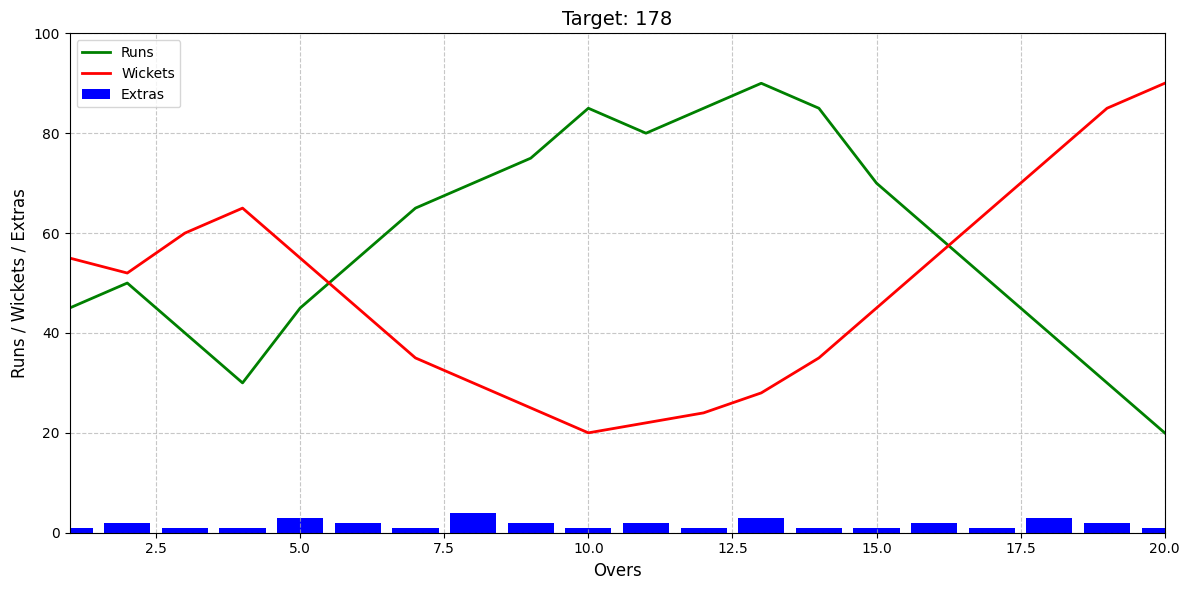

In [63]:

import matplotlib.pyplot as plt

# Sample data (Replace with your actual data)
x = list(range(1, 21))  # Overs (1 to 20)
y1 = [45, 50, 40, 30, 45, 55, 65, 70, 75, 85, 80, 85, 90, 85, 70, 60, 50, 40, 30, 20]  # Runs
y2 = [55, 52, 60, 65, 55, 45, 35, 30, 25, 20, 22, 24, 28, 35, 45, 55, 65, 75, 85, 90]  # Wickets
y3 = [1, 2, 1, 1, 3, 2, 1, 4, 2, 1, 2, 1, 3, 1, 1, 2, 1, 3, 2, 1]  # Extras

plt.figure(figsize=(12, 6))  # Increase figure size

# Plotting the data
plt.bar(x, y3, color='blue', label='Extras')  # Bar chart for extras
plt.plot(x, y1, color='green', linewidth=2, label='Runs')  # Line chart for runs
plt.plot(x, y2, color='red', linewidth=2, label='Wickets')  # Line chart for wickets

# Title and labels
plt.title("Target: 178", fontsize=14)
plt.xlabel("Overs", fontsize=12)
plt.ylabel("Runs / Wickets / Extras", fontsize=12)

# Adjust axes limits
plt.xlim(1, 20)
plt.ylim(0, max(max(y1), max(y2)) + 10)  # Ensure all data is visible

# Improve layout and legend positioning
plt.legend(loc='best', fontsize=10)
plt.grid(True, linestyle="--", alpha=0.7)

# Automatically adjust layout
plt.tight_layout()

# Show the plot
plt.show()










In [1]:
# teams

In [67]:
delivery_df['city'].unique()

array(['Bangalore', 'Chandigarh', 'Mumbai', 'Kolkata', 'Jaipur',
       'Chennai', 'Hyderabad', 'Cape Town', 'Port Elizabeth', 'Durban',
       'Centurion', 'East London', 'Johannesburg', 'Kimberley', 'Cuttack',
       'Ahmedabad', 'Nagpur', 'Dharamsala', 'Visakhapatnam', 'Ranchi',
       'Delhi', 'Abu Dhabi', nan], dtype=object)

In [68]:
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))

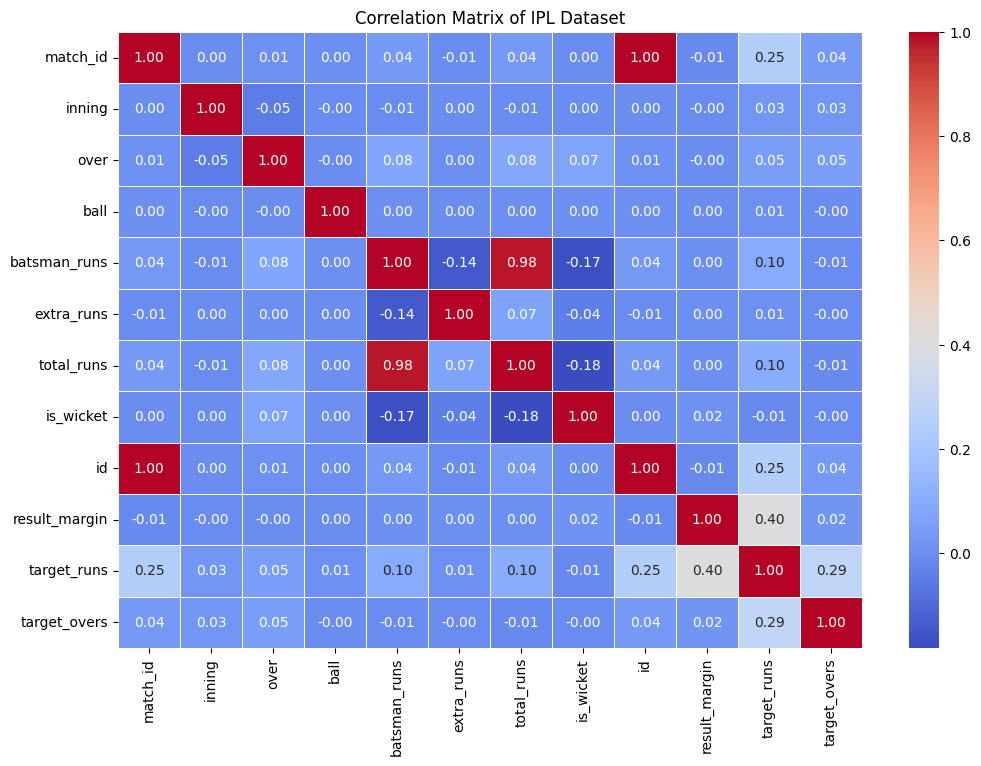

In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load datasets
deliveries_df = pd.read_csv("deliveries.csv")
matches_df = pd.read_csv("matches.csv")

# Merge datasets on match_id (deliveries) and id (matches)
merged_df = deliveries_df.merge(matches_df, left_on="match_id", right_on="id", how="inner")

# Select only numerical columns for correlation
numerical_df = merged_df.select_dtypes(include=["number"])

# Compute correlation matrix
correlation_matrix = numerical_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of IPL Dataset")
plt.show()

